# Election - Polls and Donors - Data Project

Download the data from Kaggle: [here](https://www.kaggle.com/datasets/kadser/2012-election-obama-vs-romney?resource=download)

In [ ]:
'''
NOTE - THS DATA WAS NO LONGER AVAILABLE AT THIS SOURCE
The data for the polls will be obtained from HuffPost Pollster. Website [here](http://elections.huffingtonpost.com/pollster).
'''

In this Data Project we will be looking at data from the 2012 election.

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

    1.) Who was being polled and what was their party affiliation?
    2.) Did the poll results favor Romney or Obama?
    3.) How do undecided voters effect the poll?
    4.) Can we account for the undecided voters?
    5.) How did voter sentiment change over time?
    6.) Can we see an effect in the polls from the debates?

The second data will be discussed set later on.

In [2]:
#import the libraries you will use for:

#data storage, orientation, and manipulation [i.e. standard numpy and pandas imports]
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#standard plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#standard stats library
from scipy import stats

#command for showing plots in jupyter notebooks
%matplotlib inline

We're going to use the requests module to import some data from the web. For more information on requests, refer back to the documentation [here](http://docs.python-requests.org/en/latest/).

StringIO will also be used to work with csv data we get from HuffPost. StringIO is used for a convenient means of working with text in memory using the file API, refer back to [here](http://pymotw.com/2/StringIO/) for more information.

In [ ]:
'''
NOTE - as mentioned above this data is no longer available from huffington post. But the data was found and downloaded from Kaggle.
Therefore, the csv files are added to this folder.

But I am keeping the below code a reference for later projects that might utilize this data downloading method.

# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
# NOTE - StringIO.StingIO deprecated in Python3
import io
from io import StringIO

# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source)
'''

In [3]:
# Read the poll data into a DataFrame
csv_name = '2012-general-election-romney-vs-obama.csv'

df_poll = pd.read_csv(csv_name)

In [14]:
# Use .info() on df to get a sense of what informaiton we might be missing in our dataset
df_poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                590 non-null    object 
 1   Start Date              590 non-null    object 
 2   End Date                590 non-null    object 
 3   Entry Date/Time (ET)    590 non-null    object 
 4   Number of Observations  568 non-null    float64
 5   Population              590 non-null    object 
 6   Mode                    590 non-null    object 
 7   Obama                   590 non-null    float64
 8   Romney                  590 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            590 non-null    object 
 12  Source URL              588 non-null    object 
 13  Partisan                590 non-null    object 
 14  Affiliation             106 non-null    ob

In [4]:
df_poll.head(20)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,NaN,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,NaN,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,NaN,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,NaN,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,NaN,NaN,1
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,NaN,1
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,NaN,NaN,1
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,NaN,NaN,1
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,NaN,NaN,1
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2011/PP...,Sponsor,Dem,NaN,1


##### Notes of Columns and Data:

No real notes on the columns, as they have straight forward column names.

It looks like most columns have complete information, with the exception of the Addiliation column. This column only has about 20% of the total information, which is something to keep in mind. Additionally, this will impact our first 3 observations, but we will still complete them for practice.

### Analysis & Visualization

1.) Who was being polled and what was their party affiliation?

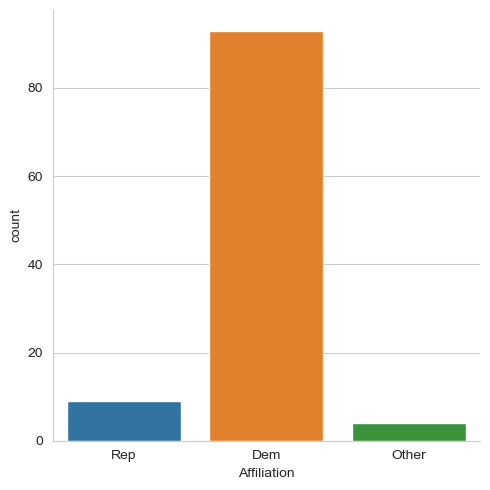

In [18]:
# 1 - Create a simply catplot that is x = Affiliation y = count
sns.catplot(data = df_poll, x = 'Affiliation', kind = 'count')

OBSERVATION 1.1 - At first glance, Dem affiliation is almost a 10:1 edge over Rep and Other, but I believe this is misleading. I believe this visual is misleading because 80% of the values are NaN. Therfore, this visual makes it look like all the poll affiliations are for the Dems.

So, after looking at the original dataset from Huffington Post, it looks like there was an affiliation type for 'None' [i.e. the poll did not have an affiliation]. Therefore, I will make the assumption that the NaN values are actually the 'None' affiliation type from the previous dataset.

In [19]:
# Adding 'None' affiliation type for NaN values, and re-doing the catplot:

# Filling NaN values
df_poll.fillna('None', inplace = True)

# Show Change
df_poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,None,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,None,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,None,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,None,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,None,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,None,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,None,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,None,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,None,None,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,None,1


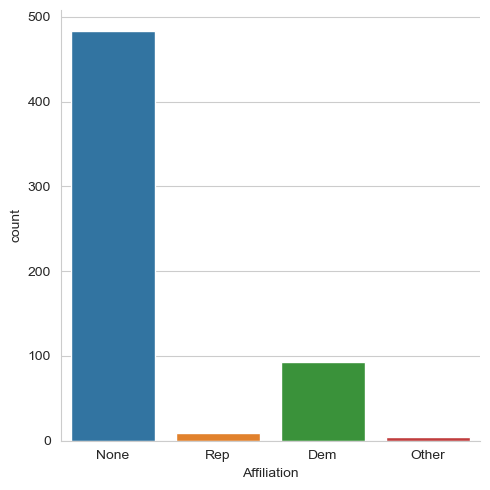

In [20]:
# Re-plot catplot for - x = Affiliation y = count
sns.catplot(data = df_poll, x = 'Affiliation', kind = 'count')

OBSERVATION 1.1 [MODED] - Adding in 'None' as a category to poll affiliation gives us a very different observation. The original visual showed that poll affiliation heavily favoured Dems. Therefore, raising the concern of bais data/polling. But the new visual shows that, approximately, 80% of the poll affiliations are not affiliated with a policitcal party.

Therefore, I think it is safe to say that the polling data is relatively unbais.

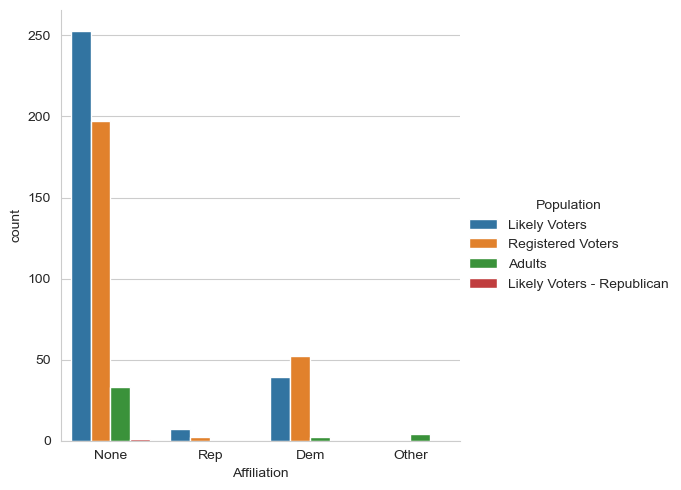

In [21]:
# 1.2 - Create a catplot showing the Affiliation split by Population
sns.catplot(data = df_poll, x = 'Affiliation', hue = 'Population', kind = 'count')

OBSERVATION 1.2 - Based on the visual, 90% of the voting data is for Likely Voters, or Registered Voters. Therefore, I think a safe observation is that poll numbers are a good reflection of population voting numbers because the sampled population is of people that will vote.

2.) Did the poll results favor Romney or Obama?

<Axes: >

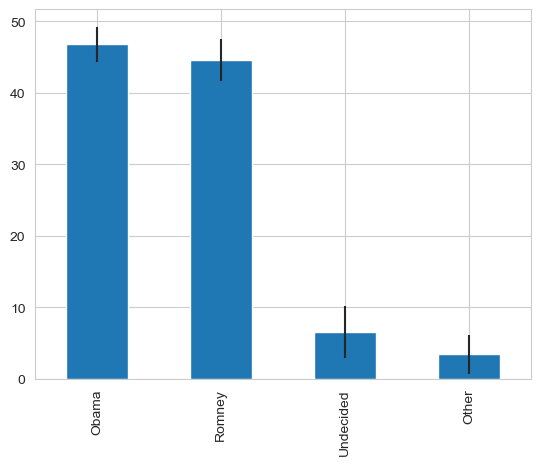

In [19]:
# Create a visual that shows the average number of people that voted for, including std for each:
'''
- Obama
- Romney
- Undecided
'''
# Create an average poll df
df_average_polling = DataFrame(df_poll[['Obama','Romney','Undecided','Other']].mean())

# Create a standard deviation df
df_average_polling_std = DataFrame(df_poll[['Obama','Romney','Undecided','Other']].std())

# Plot a bar chart, with std errors, for the average polling data
df_average_polling.plot(yerr = df_average_polling_std, kind = 'bar', legend = False)

OBSERVATION 2.1 - The Obama and Romney numbers are close, therefore, we want to look closer at the actual numbers to get a better idea of the data.

In [27]:
# For closer examination create and show a new DataFrame with both the average and std numbers in it:

# Concat the 2 dfs into a new df
df_polling = pd.concat([df_average_polling,df_average_polling_std], axis = 1)

# Naming Columns
df_polling.columns = ['Average','Std']

#Show
df_polling

,Average,Std
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614
Other,3.400990,2.721318


OBSERVATION 2.1 [MODED] - Looks like the polls indicate it as a fairly close race, but what about the undecided voters? Most of them will likely vote for one of the candidates once the election occurs. If we assume we split the undecided evenly between the two candidates the observed difference should be an unbiased estimate of the final difference.

<Axes: xlabel='End Date'>

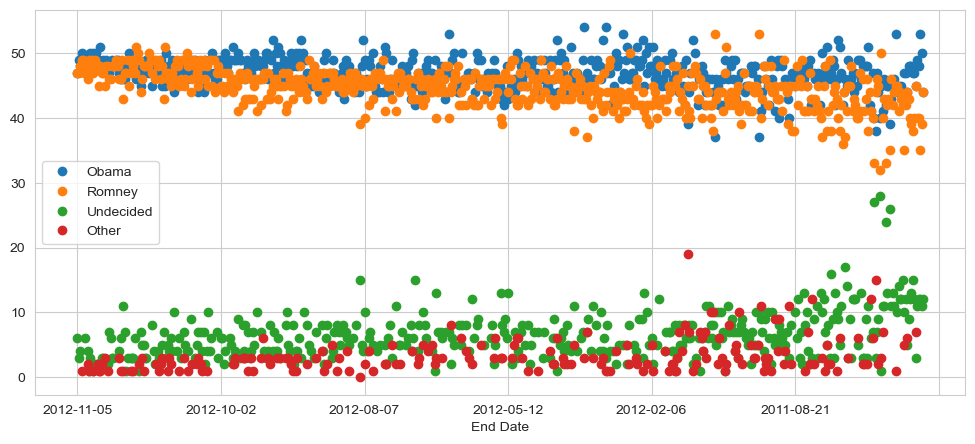

In [31]:
# Quick and dirty Time Series Analysis of polling over time:
df_poll.plot(x = 'End Date', y = ['Obama','Romney','Undecided','Other'], figsize = (12,5), marker = 'o', linestyle = '')

OBSERVATION 2.2:
    
    - NOTE - the time axis is in reverse chronological order.
    - Generally, as the time gets closer to the election the spread in Undecided and Other decreases, and the decision between Obama and Romney solidifies. Which seems logical based on the fact that the closer you get to the election the more people will have made a decision on who they will vote for.

NOTE - Although the above graph gives us an idea of what the trend of polling data is, it might be more precise to voter sentiment [i.e. % difference of voting] over time.

In [33]:
# For date stamps import datetime
from datetime import datetime

In [35]:
# Create a % Difference column in the dataframe
df_poll['% Difference'] = (df_poll.Obama - df_poll.Romney)/100

# Show df
df_poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,% Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,NaN,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,NaN,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,NaN,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,NaN,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,NaN,NaN,1,-0.01


NOTE - for the % Difference column. a +ve number meanings that voter sentiment favours Obama and a -ve number means voter sentiment favours Romney

In [48]:
# Create a new DataFrame that groups starting dates and averages the % Difference.

# Drop any unnecessary columns because pandas can't handle averaging non-num columns
df_voter_sentiment = df_poll.drop(['Pollster','End Date','Entry Date/Time (ET)','Number of Observations','Population',
                                  'Pollster URL','Source URL','Partisan','Affiliation','Question Text','Question Iteration',
                                  'Mode'],
                                  axis = 1)
# Show Voter Sentiment df
df_voter_sentiment.head()

# Grouping voter sentiment to get the daily % difference
df_voter_sentiment = df_poll.groupby(by = 'Start Date', as_index = False).mean(numeric_only = True)

NOTES:

    - dropping in the above case was useless. Forgot that Python updated the mean argument of numeric_only from default True -> default False
    - Additionally, the as_index = False is being used because we want the groupby to be more like an SQL command. We want to perserve the index = [0,1,2,3...] as opposed to making the Start Date the new index. This is because we want to utilize the numbered index for a future visual.

<Axes: xlabel='Start Date'>

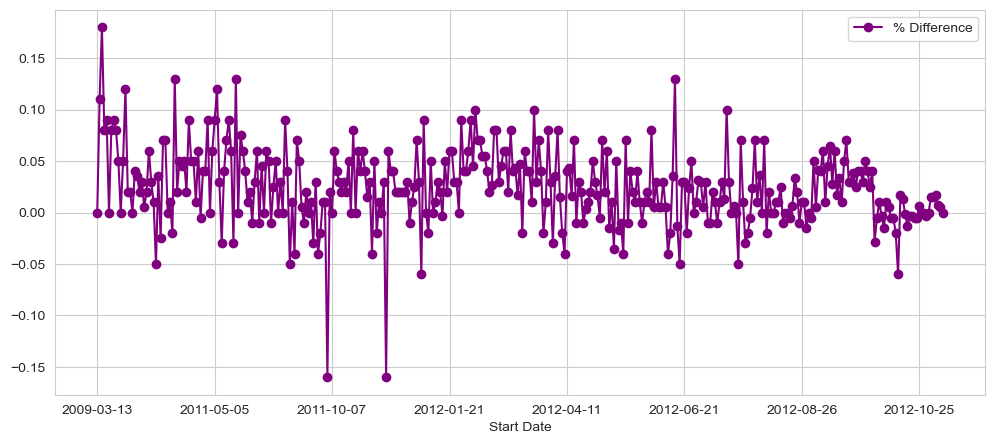

In [49]:
# Create the Time Series plot for voter sentiment through pandas built-in plotting
df_voter_sentiment.plot(x = 'Start Date', y = '% Difference', figsize = (12,5), color = 'purple', marker = 'o', linestyle = '-')

I would be interesting to plot marker lines on the dates of the debates and see if there are any general insight to the poll results.

The debates were Oct 3, Oct 11, and Oct 22. Therefore, zoom into the month of Oct and them plot some lines as markers.

THOUGHT PROCESS:

    - in order to find where to set the x limits for the figure we need to find out where the index for the month of October 2012 is. Use a FOR loop to find the row index.

In [52]:
# Finding the indicies for the the Start and End of Oct 2012:

#set the row count and xlimit list
row_index = 0
xlimit = []

#loop through the start dates until 2012-10 is found, the print the row index
for date in df_voter_sentiment['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_index)
        row_index += 1
    else:
        row_index += 1
        
print(min(xlimit))
print(max(xlimit))

329
356


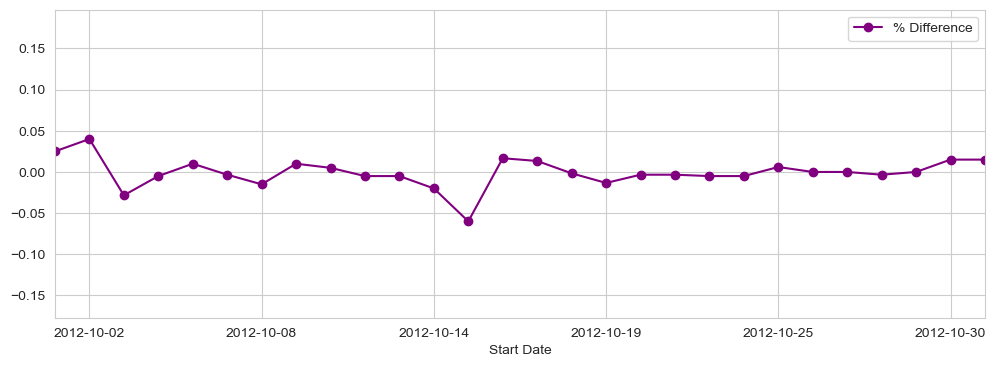

In [53]:
# Now that we have the limits for October, plot just Oct 2012

# Start with original figure
fig = df_voter_sentiment.plot('Start Date','% Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(329,356))

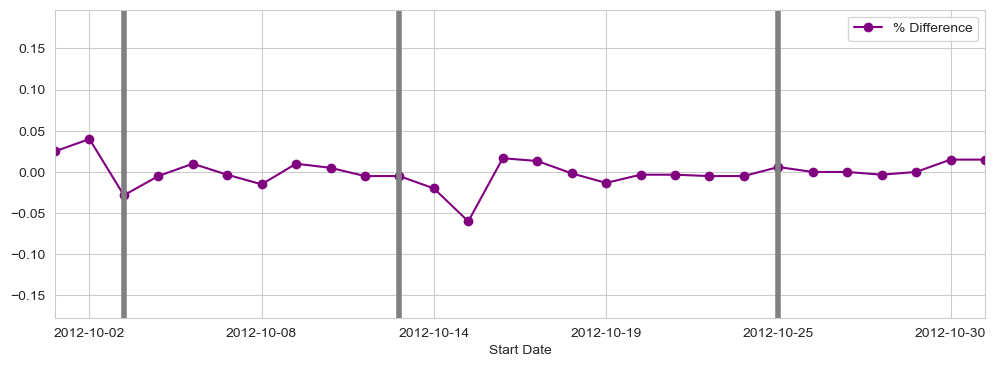

In [55]:
fig = df_voter_sentiment.plot('Start Date','% Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(329,356))

#add the markers for the debate days
plt.axvline(x=329+2, linewidth=4, color='grey')
plt.axvline(x=329+10, linewidth=4, color='grey')
plt.axvline(x=329+21, linewidth=4, color='grey')

Surprisingly, thse polls reflect a dip for Obama after the second debate against Romney, even though memory serves that he performed much worse against Romney during the first debate.

For all these polls it is important to remeber how geographical location can effect the value of a poll in predicting the outcomes of a national election. 

# Donor Dataset

Let's go ahead and switch gears and take a look at a data set consisting of information on donations to the federal campaign. 

This is going to be the biggest data set we've looked at so far. You can download it [here](https://www.dropbox.com/s/l29oppon2veaq4n/Election_Donor_Data.csv?dl=0) , then make sure to save it to the same folder your iPython Notebooks are in.

The questions we will be trying to answer while looking at this Data Set is:

    1.) How much was donated and what was the average donation?
    2.) How did the donations differ between candidates?
    3.) How did the donations differ between Democrats and Republicans?
    4.) What were the demographics of the donors?
    5.) Is there a pattern to donation amounts?
    

In [4]:
# Import Donor Dataset, but make sure it is in the correct path
df_donor = pd.read_csv('Election_Donor_Data.csv')

C:\Users\ggebu\AppData\Local\Temp\ipykernel_18308\1849664475.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_donor = pd.read_csv('Election_Donor_Data.csv')


In [6]:
# Get an idea for the completeness of the dataset as well as what columns we are working with
df_donor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

Notes on Columns:

    - looks like we have all the informtion for most columns
    - the columns that are missing the most information are columns that we wont be using [i.e. memo and receipt description columns
    - cand = candidate
    - contbr = contributor

In [7]:
# Preview the dataframe to get an idea for what the data looks like
df_donor.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


1.) How much was donated and what was the average donation?

In [9]:
# Show a list of the quautity of donations @ each amount [i.e. count the values of each donation amount]
df_donor['contb_receipt_amt'].value_counts()

contb_receipt_amt
 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
             ...  
 386.10          1
-113.40          1
 1385.00         1
 43.98           1
 2408.79         1
Name: count, Length: 8079, dtype: int64

OBSERVATION 1.1 - it looks like there is a wide range of donated amounts. [i.e. there is a large discrepency between the number of people that donated 100 dollars and people that donated exactly 2408.79 dollars]. Therefore, let's look at the average and std of donation amounts to get a better idea of what donation data we are working with.

In [12]:
# Get the mean donated amount and the std of the donations:

#get the average donated amount
#df_donor['contb_receipt_amt'].mean()

#get the std of the donated amounts
#df_donor['contb_receipt_amt'].std()

#print the average and the std of the donor donations
print('The average donation was %.2f with a std of %.2f' %(df_donor['contb_receipt_amt'].mean(),df_donor['contb_receipt_amt'].std()))

The average donation was 298.24 with a std of 3749.67


OBSERVATION 1.2 - the std on the donations is extremely high. Therefore, it is logical to look at what outliers might be causing the std to skyrocket.

In [39]:
# Create a top donor dataframe so we can sort the donations /wo disrrupting the original dataframe
df_top_donor = df_donor.copy()

In [40]:
df_top_donor['contb_receipt_amt'].sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

OBSERVATION 1.3 - Its odd that there are -ve donations, BUT after some research this is because this dataset accounts for refunds to contributors. Additionally, it looks like there are handful of donations above the 5000 dollar mark, which suggests that are outliners on both sides that are increasing the std of the donations.

Because of the above observation we will remove the -ve values [i.e. refunds] from the copied dataset

In [43]:
# Get rid of -ve values in dataset
df_top_donor = df_top_donor[df_top_donor['contb_receipt_amt']>0]

In [44]:
# Check that we got rid of -ve numbers
df_top_donor['contb_receipt_amt'].sort_values()

335573          0.01
335407          0.01
335352          0.01
324596          0.01
329896          0.01
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 991475, dtype: float64

In [47]:
# List the top 10 most common donation amounts [i.e. count the amount of donations of get amount and sort them]
df_top_donor['contb_receipt_amt'].value_counts().sort_values(ascending = False).head(10)

contb_receipt_amt
100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: count, dtype: int64

It would be interesting to see if most people donate in whole number amounts. Therefore, create a histogram capped at 2500 to see if donor donate in whole numbers more often than not.

<Axes: >

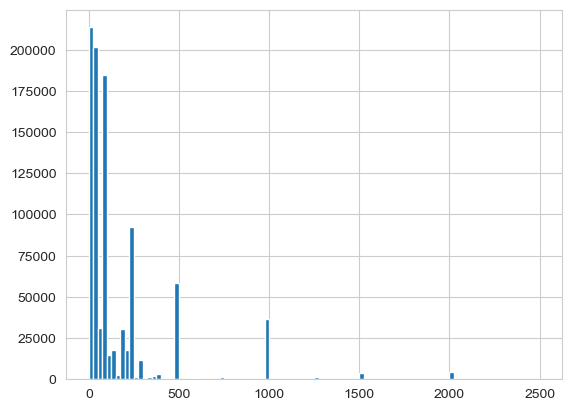

In [53]:
# Creating Histogram
df_donations = df_top_donor[df_top_donor['contb_receipt_amt'] < 2500]

df_donations['contb_receipt_amt'].hist(bins = 100)

OBSERVATION 1.4 - it does indeed look like contributors donating in whole numbers more often than not

Its great that we pulled information about the amount donated and quantity of donations at each donation amount. BUT it would be interesting to look at donations by candidate, party, and/or occupation. Therefore, that is was this next section will be about.

NOTE - We need to think about how we can go about getting the party donation information, because we don't have a column for it. Looking at the dataset columns it looks like we can take the candidate name and related it to their affiliated party to get a party column. This can be done through a map or a for loop. We will use the map because of its speed, but will comment out the for loop method for later reference.

In [54]:
df_donor.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [58]:
# Create a new column for 'Party' Affiliation

#get the unique list of candidate names
candidate_names = df_donor['cand_nm'].unique()

#show list
candidate_names

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

Now that we have the list of candidates we can see that all the candidates are Republican with the exception of Barack.

Therefore, if we chose to create the 'Party' column via a for loop it would like something like below:

In [67]:
'''
df_donor['Party'] = 0
index = 0

for candidate in df_donor['cand_nm']:
    if candidate == 'Obama Barack':
        df_donor['Party'][index] = 'Democrat'
        index += 1
    else:
        df_donor['Party'][index] = 'Republican'
        index =+ 1

OR

for i in xrange(0,len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama,Barack':
        donor_df['Party'][i] = 'Democrat'
    else:
        donor_df['Party'][i] = 'Republican'
'''

"\ndf_donor['Party'] = 0\nindex = 0\n\nfor candidate in df_donor['cand_nm']:\n    if candidate == 'Obama Barack':\n        df_donor['Party'][index] = 'Democrat'\n        index += 1\n    else:\n        df_donor['Party'][index] = 'Republican'\n        index =+ 1\n\nOR\n\nfor i in xrange(0,len(donor_df)):\n    if donor_df['cand_nm'][i] == 'Obama,Barack':\n        donor_df['Party'][i] = 'Democrat'\n    else:\n        donor_df['Party'][i] = 'Republican'\n"

In [68]:
# Create a dictionary for mapping
name_to_party_map = {'Bachmann, Michelle':'Republican', 'Romney, Mitt':'Republican', 'Obama, Barack':'Democrat',
       "Roemer, Charles E. 'Buddy' III":'Republican', 'Pawlenty, Timothy':'Republican',
       'Johnson, Gary Earl':'Republican', 'Paul, Ron':'Republican', 'Santorum, Rick':'Republican',
       'Cain, Herman':'Republican', 'Gingrich, Newt':'Republican', 'McCotter, Thaddeus G':'Republican',
       'Huntsman, Jon':'Republican', 'Perry, Rick':'Republican'}

In [69]:
# Map party affiliation to new column in df
df_donor['Party'] = df_donor['cand_nm'].map(name_to_party_map)

In [70]:
# Show that the mapping worked
df_donor

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678,Republican
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican


In [71]:
# Remove refunds from original df
df_donor = df_donor[df_donor['contb_receipt_amt']>0]

In [73]:
# Create a table to show the total people that contributed to each member
df_donor['cand_nm'].value_counts()

cand_nm
Obama, Barack                     589127
Paul, Ron                         143161
Romney, Mitt                      105155
Gingrich, Newt                     46883
Santorum, Rick                     46245
Cain, Herman                       20052
Bachmann, Michelle                 13082
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Huntsman, Jon                       4066
Pawlenty, Timothy                   3844
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Name: count, dtype: int64

OBSERVATION 2.1 - Based on the table above, we can see that Barack Obama had the most people donate to him. With that said, this is because he was the only Democrat candidate. 

In [74]:
# Create a table to look at total amount of money donated to each of the candidates
df_donor.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

OBSERVATION 2.2 - the above table is hard to read, and data science is about making information readable. Therefore, print out the amount donated for readable.

In [77]:
# Create a FOR loop to loop through the candidate and print out the amount donated

#create df to loop through [i.e. candidate and amount donated]
df_amount_donated_to_candidate = df_donor.groupby('cand_nm')['contb_receipt_amt'].sum()

In [92]:
#create the for loop
index = 0

for candidate in df_amount_donated_to_candidate:
    print('The candidate %s raised %.0f dollars' %(df_amount_donated_to_candidate.index[index], candidate))
    print('\n')
    index += 1

The candidate Bachmann, Michelle raised 2711439 dollars


The candidate Cain, Herman raised 7101082 dollars


The candidate Gingrich, Newt raised 12832770 dollars


The candidate Huntsman, Jon raised 3330373 dollars


The candidate Johnson, Gary Earl raised 566962 dollars


The candidate McCotter, Thaddeus G raised 39030 dollars


The candidate Obama, Barack raised 135877427 dollars


The candidate Paul, Ron raised 21009620 dollars


The candidate Pawlenty, Timothy raised 6004819 dollars


The candidate Perry, Rick raised 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars


The candidate Romney, Mitt raised 88335908 dollars


The candidate Santorum, Rick raised 11043159 dollars




OBSERVATION 2.3 - Great that we can now read the amount raised by each candidate, BUT this is not suitable for comparison. Therefore, create a bar graph to display this data for comparing.

<Axes: xlabel='cand_nm'>

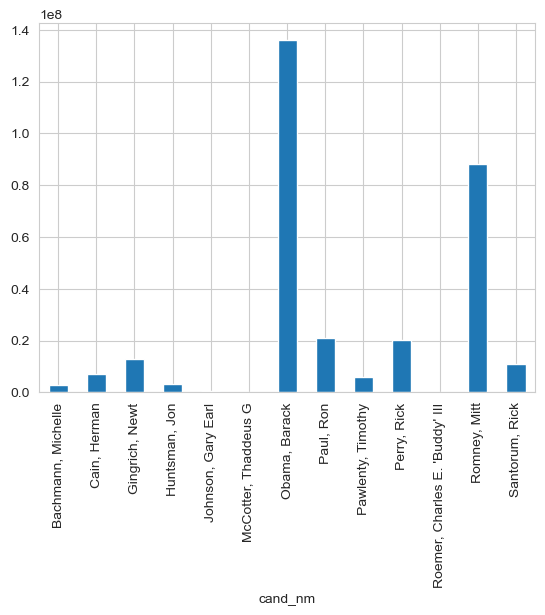

In [93]:
# Create a bar graph. x = candidate vs. y = sum of amount donated
df_amount_donated_to_candidate.plot(x = 'cand_nm', kind = 'bar')

OBSERVATION 2.4 - Now the comparison is easy. Now we can clearly see that Obama is the front-runner in donation amounts, which makes sense, as he is not competeing with any other democratic nominees.

    3.) How did the donations differ between Democrats and Republicans?


<Axes: xlabel='Party'>

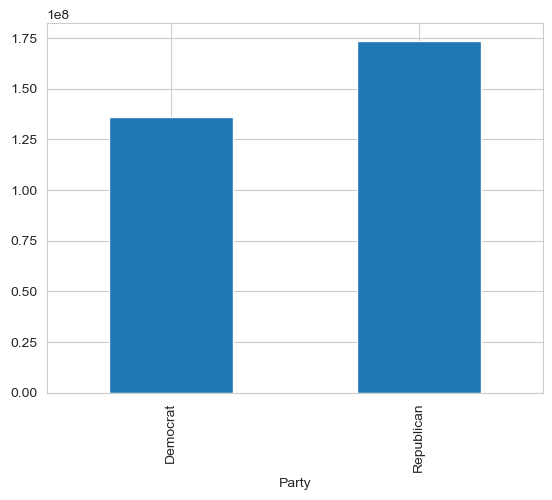

In [95]:
# Create a graph to show amount donated to each party
df_donor.groupby('Party')['contb_receipt_amt'].sum().plot(x = 'Party', kind = 'bar')

    4.) What were the demographics of the donors?
    5.) Is there a pattern to donation amounts?

Finally to start closing out the project, let's look at donations and who they came from (as far as occupation is concerned). We will start by grabing the occupation information from the df_donor DataFrame and then using pivot_table to make the index defined by the various occupations and then have the columns defined by the Party (Republican or Democrat). Finally we'll also pass an aggregation function in the pivot table, in this case a simple sum function will add up all the comntributions by anyone with the same profession.

In [99]:
# Create a pivot table to aggregate donor occupation, party, and amount donated
df_donor_occupation = df_donor.pivot_table(values = 'contb_receipt_amt', index = 'contbr_occupation', columns = 'Party', aggfunc = 'sum')

In [100]:
df_donor_occupation

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


OBSERVATION 4.1 - as we can see from the pivot table, there are 45067 rows, which is too large to display in a static visualization. We can double check the size via the shape method.

In [108]:
df_donor_occupation.shape

(31, 2)

Let's try limiting the occupations to ones that donated 25000 dollars plus.

In [107]:
df_donor_occupation = df_donor_occupation[df_donor_occupation.sum(1) > 1000000]

In [109]:
df_donor_occupation.shape

(31, 2)

<Axes: xlabel='contbr_occupation'>

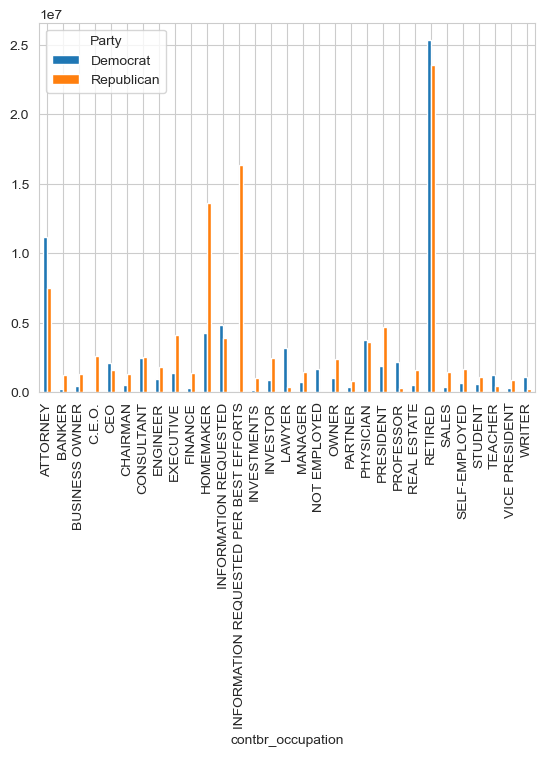

In [110]:
df_donor_occupation.plot(kind = 'bar')

Hard to read therefore make it horizontal

<Axes: ylabel='contbr_occupation'>

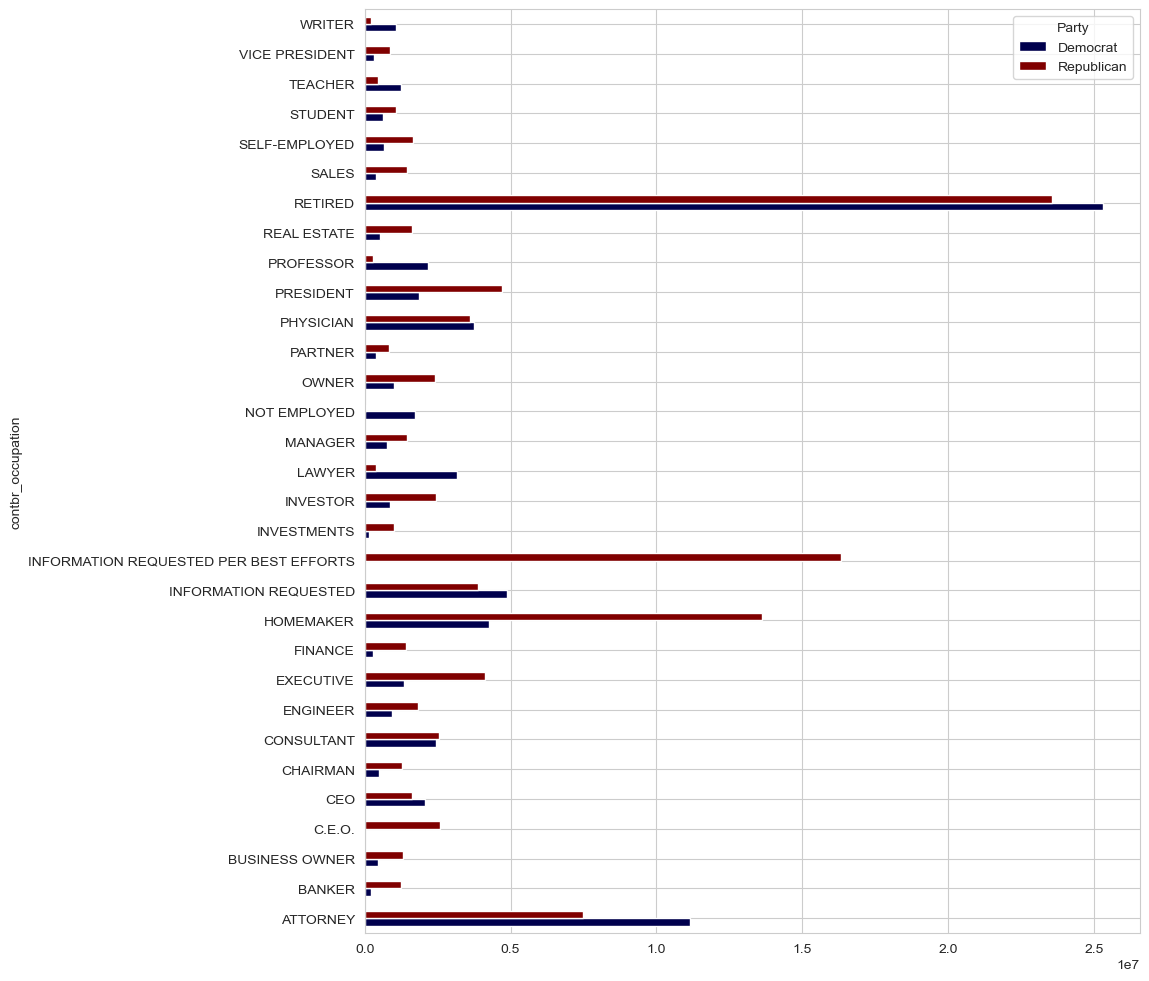

In [114]:
df_donor_occupation.plot(kind = 'barh', figsize = (10,12), cmap = 'seismic')

OBSERVATION 4.2 - Information Requested per Best Efforts and Information Requested are not occupations, therefore remove them. Additionally, there are 2 CEO occupations, therefore, combine them.

In [117]:
# Remove the two above occupations
df_donor_occupation.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'], inplace = True)

KeyError: "['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'] not found in axis"

In [118]:
# Combine CEO occupations
df_donor_occupation.loc['CEO'] = df_donor_occupation.loc['CEO'] + df_donor_occupation.loc['C.E.O.']

C:\Users\ggebu\AppData\Local\Temp\ipykernel_18308\2388454548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_donor_occupation.loc['CEO'] = df_donor_occupation.loc['CEO'] + df_donor_occupation.loc['C.E.O.']


In [120]:
# Drop the C.E.O. index
df_donor_occupation.drop('C.E.O.', inplace = True)

C:\Users\ggebu\AppData\Local\Temp\ipykernel_18308\1029785382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_donor_occupation.drop('C.E.O.', inplace = True)


<Axes: ylabel='contbr_occupation'>

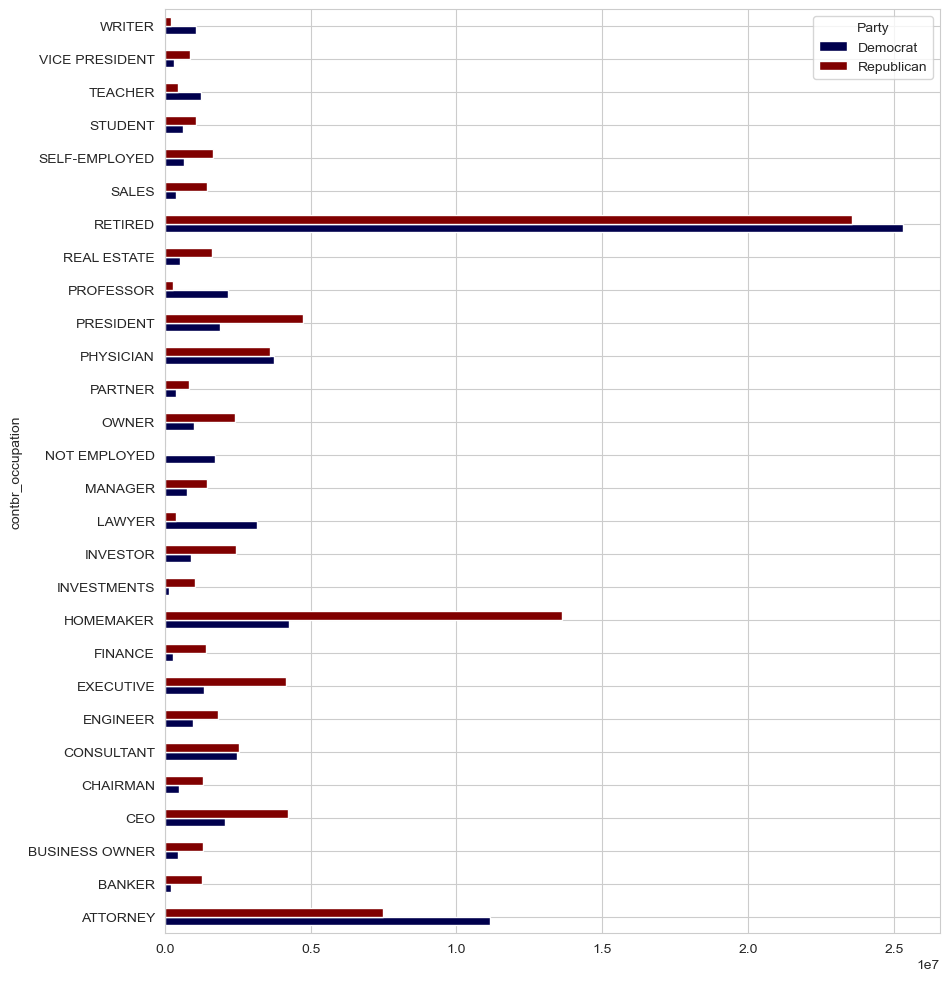

In [122]:
# Re-plot
df_donor_occupation.plot(kind = 'barh', figsize = (10,12), cmap = 'seismic')

For more on general data analysis of politics, reference [538](http://fivethirtyeight.com/politics/) website

#### Election Data Project - Complete